In [32]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [33]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index.remove('G_ratio')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'inf_time']

In [34]:
df = df_raw.copy()

In [35]:
# df = df[df['G_ratio']==25]
df = df[df['model']=='Resnet18']
df = df[df['GDC'] == 'on']
df = df[df['IOparameter'] == 'non-ideal']
df = df[df['pgm_noise_scale'] == 1]
# df = df[df['retrain'] == 'X']
df = df[df['Gmin']=='default']
df = df[df['drift_model'] == 'log']
# df = df[(df['drift_model'] == 0.01)  | (df['drift_model'] == 'log')]

In [36]:
df['pruning'].unique()

array([0.3, 0.4, 0.5, 0.6, 0.7, '-'], dtype=object)

In [27]:
# df

In [37]:
df['new_col'] = df['pruning'].astype(str) + '_' + df['retrain'].astype(str) + '_' + df['drift_model'].astype(str)

In [38]:
df['new_col'].unique()

array(['0.3_X_log', '0.4_X_log', '0.5_X_log', '0.6_X_log', '0.7_X_log',
       '-_X_log', '0.3_O_log', '0.4_O_log', '0.5_O_log', '0.6_O_log',
       '0.7_O_log'], dtype=object)

In [39]:
df_pivot = df.pivot_table(index=pivot_index, columns='new_col', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns 

In [45]:
# df_pivot

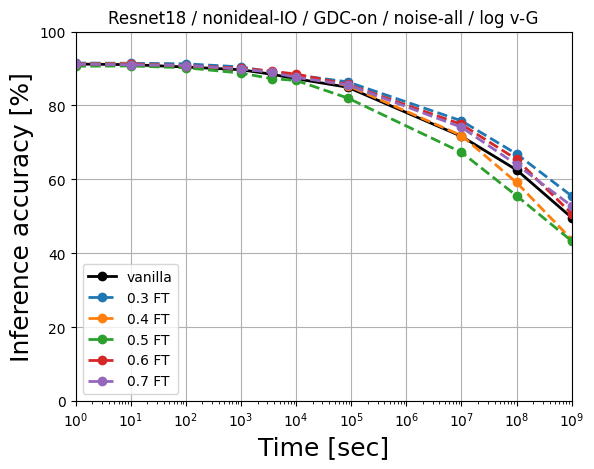

In [40]:
# error 해결 후

import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / nonideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

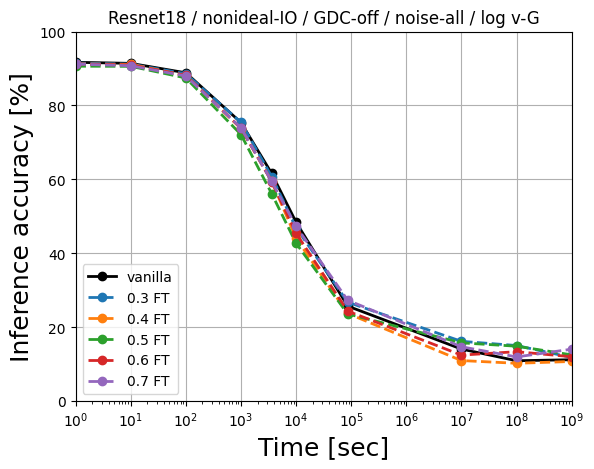

In [31]:
# error 해결 후

import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / nonideal-IO / GDC-off / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

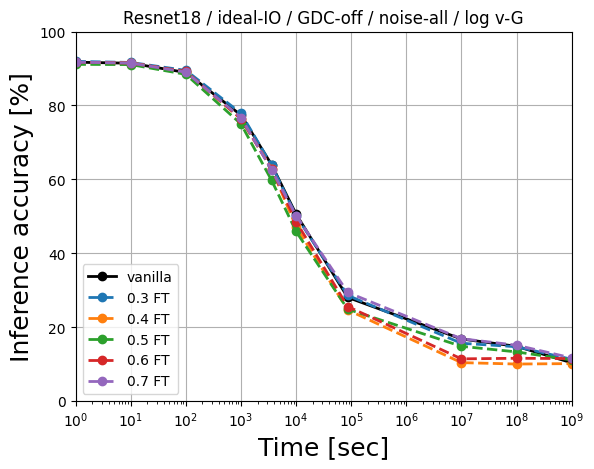

In [24]:
# error 해결 후

import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-off / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

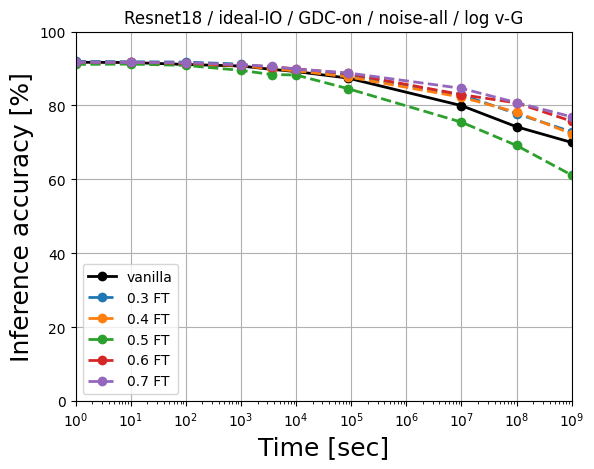

In [12]:
# error 해결 후

import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

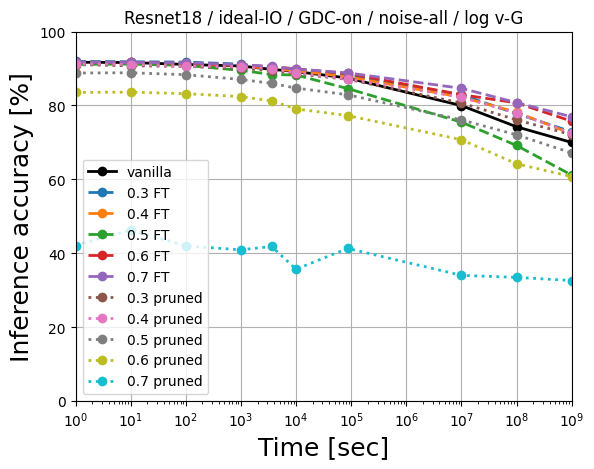

In [11]:
# error 해결 후

import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

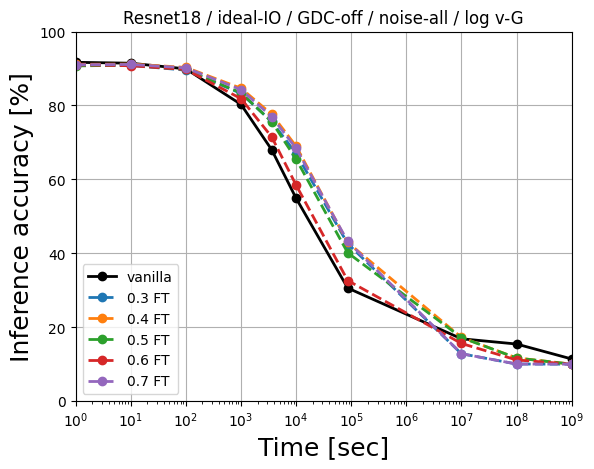

In [102]:
import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-off / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

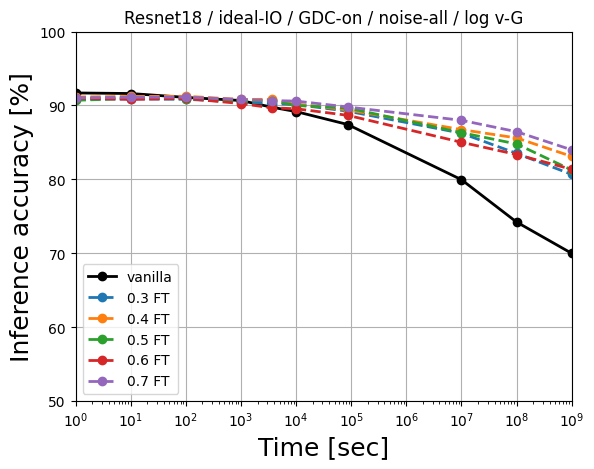

In [95]:
import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

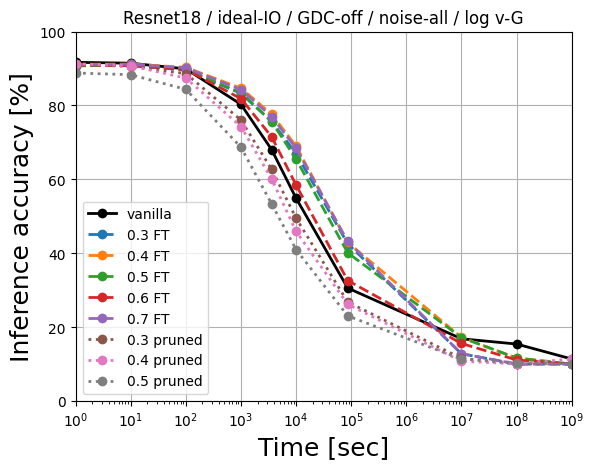

In [67]:
import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
# plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-off / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

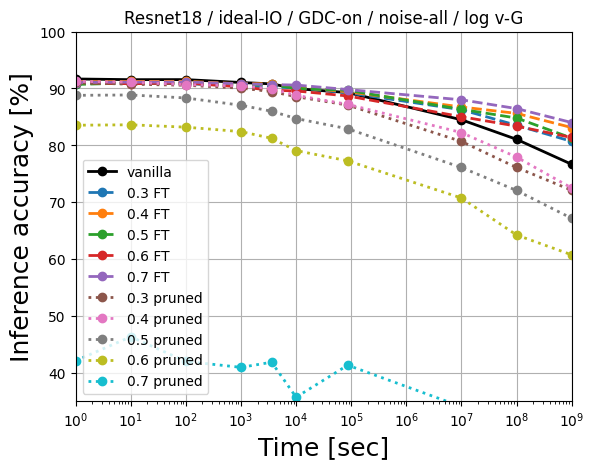

In [72]:
import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / ideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(35,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

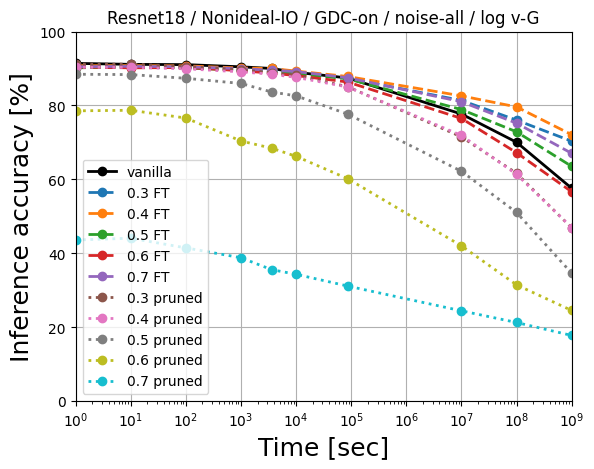

In [80]:
import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / Nonideal-IO / GDC-on / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

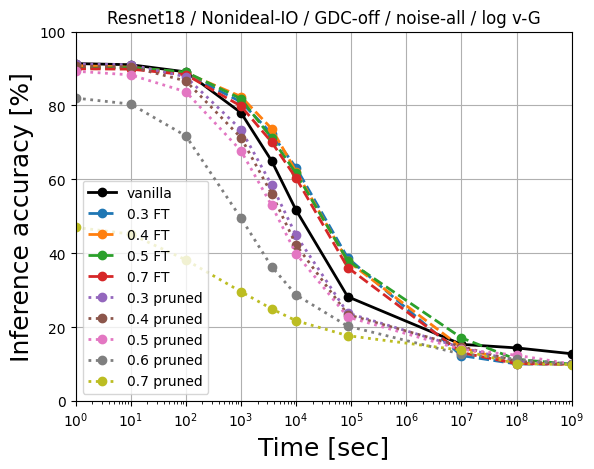

In [86]:
import matplotlib.pyplot as plt

df_pivot = df_pivot[df_pivot['inf_time'] != 1e6]

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_X_log'], marker='o', label = 'vanilla', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_O_log'], marker='o', label = '0.3 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_O_log'], marker='o', label = '0.4 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_O_log'], marker='o', label = '0.5 FT', linestyle='--', linewidth=2)
# plt.plot(x,df_pivot['0.6_O_log'], marker='o', label = '0.6 FT', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_O_log'], marker='o', label = '0.7 FT', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['0.3_X_log'], marker='o', label = '0.3 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.4_X_log'], marker='o', label = '0.4 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.5_X_log'], marker='o', label = '0.5 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.6_X_log'], marker='o', label = '0.6 pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.7_X_log'], marker='o', label = '0.7 pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / Nonideal-IO / GDC-off / noise-all / log v-G")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()